<a href="https://colab.research.google.com/github/LekanOye/AI-and-ML-Projects/blob/main/Classification_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Classification Algorithms**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
fruits = pd.read_table('/content/sample_data/fruit_data_with_colors.txt')

print(fruits.head())

   fruit_label fruit_name fruit_subtype  mass  width  height  color_score
0            1      apple  granny_smith   192    8.4     7.3         0.55
1            1      apple  granny_smith   180    8.0     6.8         0.59
2            1      apple  granny_smith   176    7.4     7.2         0.60
3            2   mandarin      mandarin    86    6.2     4.7         0.80
4            2   mandarin      mandarin    84    6.0     4.6         0.79


In [4]:
print(fruits['fruit_name'].unique())
print(fruits.groupby('fruit_name').size())

['apple' 'mandarin' 'orange' 'lemon']
fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


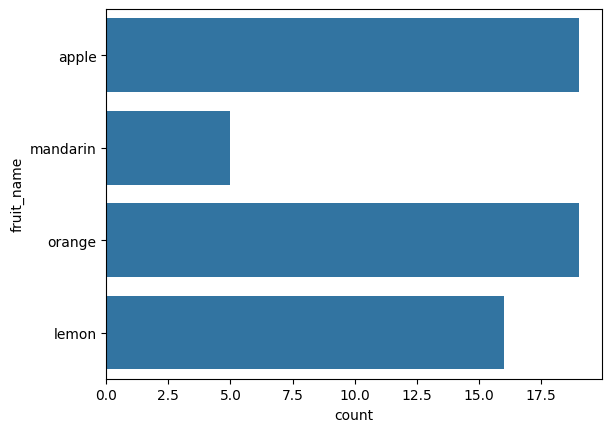

In [7]:
sns.countplot(fruits['fruit_name'],label='Count')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


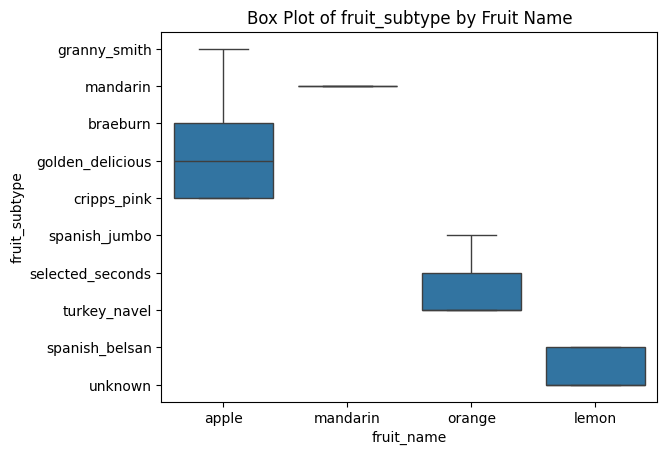

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


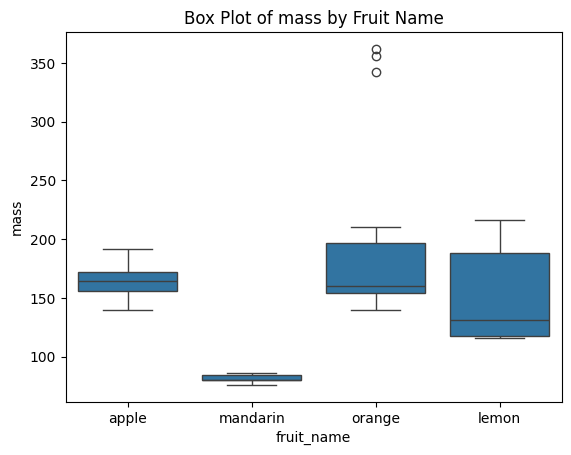

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


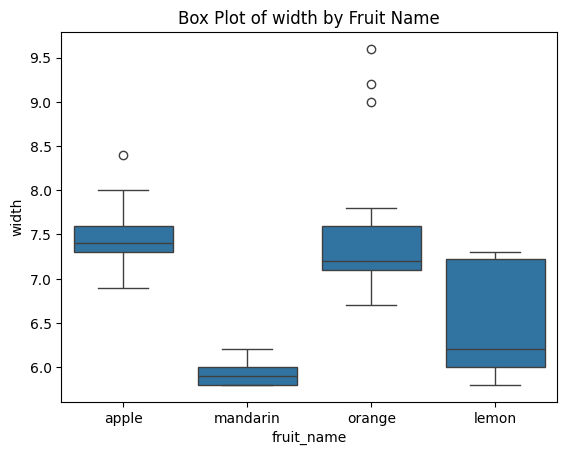

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


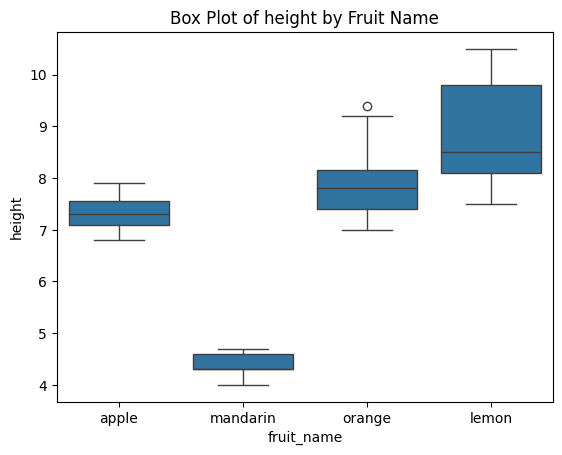

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


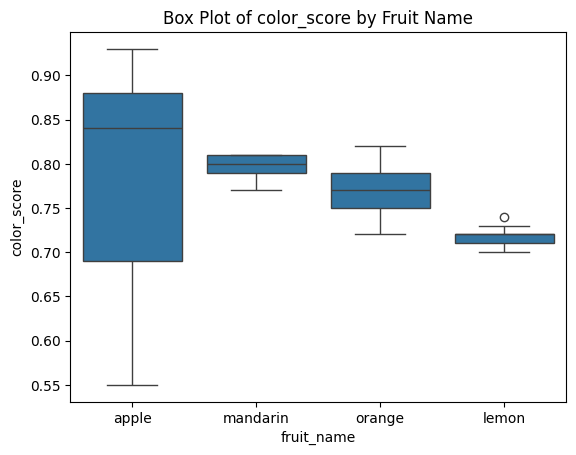

In [9]:
for col in ['fruit_subtype', 'mass', 'width', 'height', 'color_score']:
    sns.boxplot(x='fruit_name', y=col, data=fruits)
    plt.title(f'Box Plot of {col} by Fruit Name')  # Add a title for clarity
    plt.show()

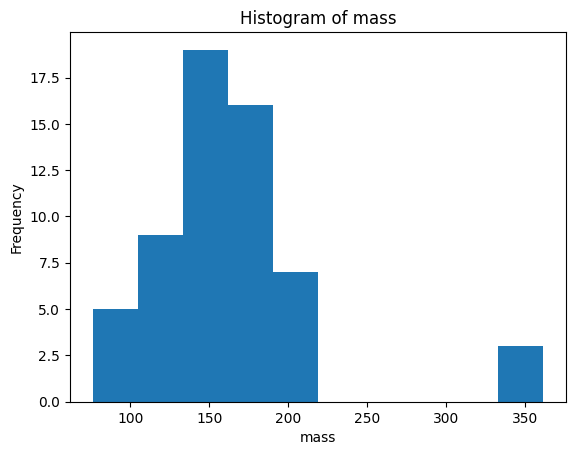

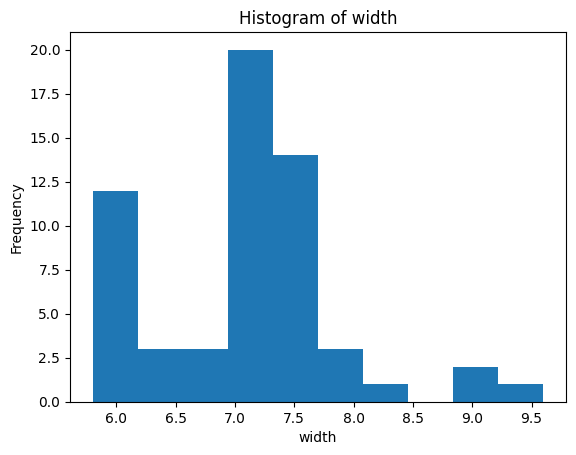

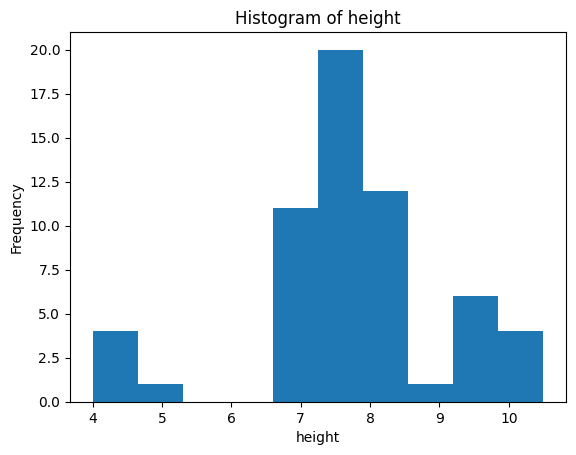

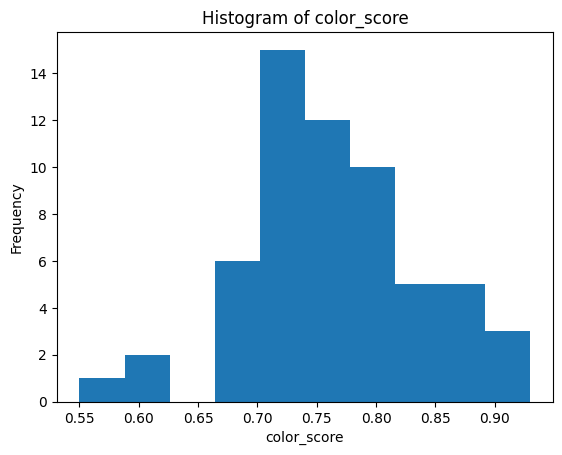

In [10]:
for col in ['mass', 'width', 'height', 'color_score']:
    plt.hist(fruits[col], bins=10)  # Adjust bins as needed
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [6]:
## separate data into targets and variables

feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_label']


## data slicing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


## to scale data so that data values will have similar range

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [11]:
## Build 1st model -> Logistic regression

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

## check model accuracy

print ('The accuracy of Logistic regression classifier on the training set: {:.2f}'.format(logreg.score (X_train, y_train)))

print ('The accuracy of Logistic regression classifier on the training set: {:.2f}'.format(logreg.score (X_test, y_test)))

The accuracy of Logistic regression classifier on the training set: 0.75
The accuracy of Logistic regression classifier on the training set: 0.47


In [13]:
## Build 2nd model -> Decision tree

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)

## check model accuracy

print ('The accuracy of Decision Tree classifier on the training set: {:.2f}'.format(clf.score(X_train, y_train)))
print ('The accuracy of Decision Tree classifier on the test set: {:.2f}'.format(clf.score(X_test, y_test)))

The accuracy of Decision Tree classifier on the training set: 1.00
The accuracy of Decision Tree classifier on the test set: 0.73


In [14]:
## Build 3rd model -> KNN classifier

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

## check model accuracy

print ('The accuracy of KNN classifier on the training set: {:.2f}'.format(knn.score(X_train, y_train)))
print ('The accuracy of KNN classifier on the test set: {:.2f}'.format(knn.score(X_test, y_test)))

The accuracy of KNN classifier on the training set: 0.95
The accuracy of KNN classifier on the test set: 1.00


In [15]:
## Build 4th model -> Naive Bayes classifier

from sklearn.naive_bayes import GaussianNB
nbclf = GaussianNB()
nbclf.fit(X_train, y_train)


## check model accuracy

print ('The accuracy of Naive Bayes classifier on the training set: {:.2f}'.format(nbclf.score(X_train, y_train)))
print ('The accuracy of Naive Bayes classifier on the test set: {:.2f}'.format(nbclf.score(X_test, y_test)))


The accuracy of Naive Bayes classifier on the training set: 0.86
The accuracy of Naive Bayes classifier on the test set: 0.67


In [16]:
## Build 5th model -> Suport vector machine classifier

from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

## check model accuracy

print ('The accuracy of SVM classifier on the training set: {:.2f}'.format(svm.score(X_train, y_train)))
print ('The accuracy of SVM classifier on the test set: {:.2f}'.format(svm.score(X_test, y_test)))


The accuracy of SVM classifier on the training set: 0.91
The accuracy of SVM classifier on the test set: 0.80


In [18]:
## check pridiction based on best model (i.e. KNN Clasifier)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[4 0 0 0]
 [0 1 0 0]
 [0 0 8 0]
 [0 0 0 2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         2

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

